In [ ]:
import numpy as np

In [ ]:
#user input cell
m1 = float(input("Enter mass of first planetory body in kgs: "))
m2 = float(input("Enter mass of second planetory body in kgs: "))

ipos1 = list(map(float, input("Enter initial position of body 1 (x1 y1): ").split()))
ipos2 = list(map(float, input("Enter initial position of body 2 (x2 y2): ").split()))

ivel1 = list(map(float, input("Enter initial velocity of body 1 (Vx1 Vy1): ").split()))
ivel2 = list(map(float, input("Enter initial velocity of body 2 (Vx2 Vy2): ").split()))

t = float(input("Enter time instant to predict positions in seconds: "))


Enter mass of first planetory body in kgs: 60
Enter mass of second planetory body in kgs: 60
Enter initial position of body 1 (x1 y1): 0 0
Enter initial position of body 2 (x2 y2): 5 5
Enter initial velocity of body 1 (Vx1 Vy1): 79 79
Enter initial velocity of body 2 (Vx2 Vy2): 67 67
Enter time instant to predict positions in seconds: 89


In [ ]:
#data generation
from scipy.integrate import solve_ivp
ini_pos1=np.array(ipos1)
ini_pos2=np.array(ipos2)
ini_vel1=np.array(ivel1)
ini_vel2=np.array(ivel2)

y0=np.concatenate([ini_pos1,ini_pos2,ini_vel1,ini_vel2])
t_max=86400
def derivatives(t,y):
    x1 = y[0:2]
    x2 = y[2:4]
    v1 = y[4:6]
    v2 = y[6:8]
    r = np.linalg.norm(x2 - x1)
    G = 6.67e-11
    a1 = G * m2 * (x2 - x1) / r**3
    a2 = G * m1 * (x1 - x2) / r**3
    return [v1[0], v1[1], v2[0], v2[1], a1[0], a1[1], a2[0], a2[1]]

sol=solve_ivp(derivatives,[0,t_max],y0,t_eval=np.linspace(0,t_max,2000))

fin_pos1=sol.y[0:2].T
fin_pos2=sol.y[2:4].T
times=sol.t

Y=np.hstack([fin_pos1,fin_pos2])
X=times.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)




In [ ]:
#model definition
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(1,)),             # Input
    layers.Dense(64, activation='relu'), # Hidden layer 1
    layers.Dense(64, activation='relu'), # Hidden layer 2
    layers.Dense(4)                      # Output layer
])

model.compile(optimizer='adam', loss='mean_absolute_error')

history = model.fit(X_train, Y_train, epochs=40, batch_size=32, validation_split=0.1)


Epoch 1/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3131176.7500 - val_loss: 2960406.5000
Epoch 2/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3128757.5000 - val_loss: 2874055.7500
Epoch 3/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2999862.7500 - val_loss: 2646698.5000
Epoch 4/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2728688.2500 - val_loss: 2166328.5000
Epoch 5/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2144965.7500 - val_loss: 1321676.8750
Epoch 6/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1076566.1250 - val_loss: 150739.5000
Epoch 7/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 96741.7656 - val_loss: 12516.7617
Epoch 8/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6660.0498 - val_loss: 1293.4323
Epoch 9/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2741.7493 - val_loss: 3009.4648
Epoch 10/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2661.5298 - val_loss: 1631.2991
Epoch 11/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 155

In [ ]:
from sklearn.metrics import mean_absolute_error


Y_pred = model.predict(X_test)


mae = mean_absolute_error(Y_test, Y_pred)

print(f"Mean Absolute Error on Test Data: {mae:.6f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Mean Absolute Error on Test Data: 1671.422352


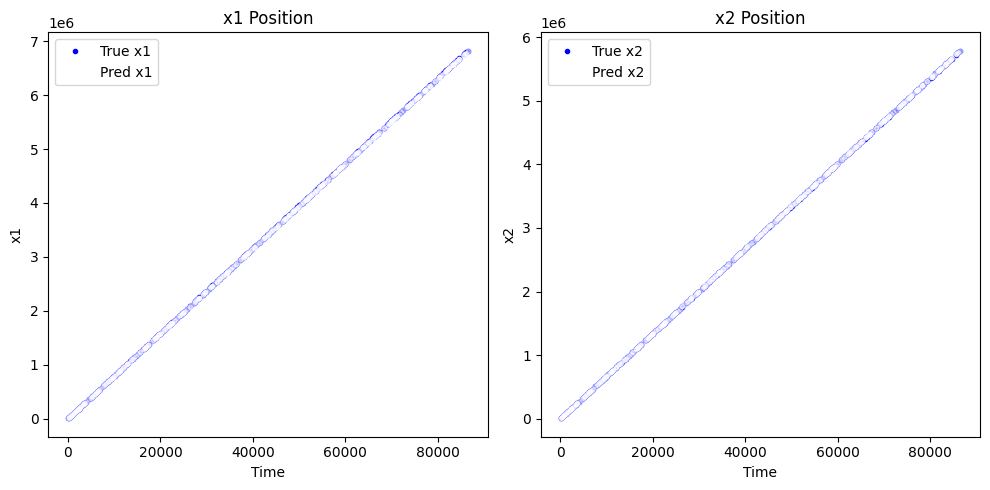

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(X_test, Y_test[:, 0], 'b.', label='True x1')
plt.plot(X_test, Y_pred[:, 0], 'w.', alpha=0.5, label='Pred x1')
plt.title('x1 Position')
plt.xlabel('Time')
plt.ylabel('x1')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(X_test, Y_test[:, 2], 'b.', label='True x2')
plt.plot(X_test, Y_pred[:, 2], 'w.', alpha=0.5, label='Pred x2')
plt.title('x2 Position')
plt.xlabel('Time')
plt.ylabel('x2')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
t_input = np.array([[t]])

pos_pred = model.predict(t_input)

pos1_pred = pos_pred[0, 0:2]
pos2_pred = pos_pred[0, 2:4]

print(f"At time t = {t}:")
print(f"Predicted position of body 1: {pos1_pred}")
print(f"Predicted position of body 2: {pos2_pred}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
At time t = 89.0:
Predicted position of body 1: [7067.647  7064.1875]
Predicted position of body 2: [6000.8984 5995.52  ]
